<a href="https://colab.research.google.com/github/banned-from-uni/SWELL-DL/blob/main/SWELL-1D-CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Part 1: Gather & Store Data

In [3]:
train = pd.read_csv('/content/drive/My Drive/SWELL/train.csv').drop('datasetId',axis=1)
test = pd.read_csv('/content/drive/My Drive/SWELL/test.csv').drop('datasetId',axis=1)

## Part 2: Clean & Organize Data

In [4]:
swell = pd.concat([train,test], axis=0)
swell = swell.reset_index(drop=True)

## Part 3: Exploratory Data Analysis

### What does the dataset look like?

In [5]:
swell

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,no stress
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410317,1118.406543,1117.857050,113.955632,18.592177,18.592071,6.129225,54.234182,18.800000,0.266667,13.150967,...,99.964170,0.347514,0.006813,0.035830,5100.718213,2789.962965,0.000358,2.183460,1.082927,time pressure
410318,855.991173,765.221410,296.763366,20.623727,20.610745,14.389415,76.416971,15.733333,3.533333,14.578861,...,91.377081,118.014128,1.383097,8.622919,8532.599635,10.597001,0.094366,1.695327,1.154370,interruption
410319,689.388662,663.192770,133.815714,21.699038,21.696138,6.166896,90.254005,13.933333,4.000000,15.346606,...,89.839595,216.200973,3.559302,10.160405,6074.251632,8.842128,0.113095,2.078000,1.214869,no stress
410320,761.421571,761.064590,60.792671,11.280586,11.280573,5.389141,79.313782,2.733333,0.266667,7.979232,...,93.094387,41.797177,3.124367,6.905613,1337.780773,13.480973,0.074179,2.191379,1.234546,no stress


### How are the labels distributed?

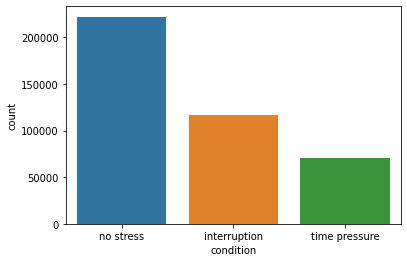

In [6]:
sns.countplot(data=swell,x='condition');

### Why does the 'no stress' *condition* have a higher *heart rate* than the stress *conditions*?

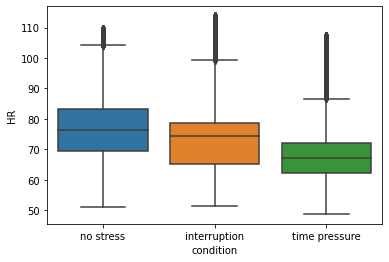

In [7]:
sns.boxplot(data=swell,x='condition',y='HR');

### How are the variables correlated?

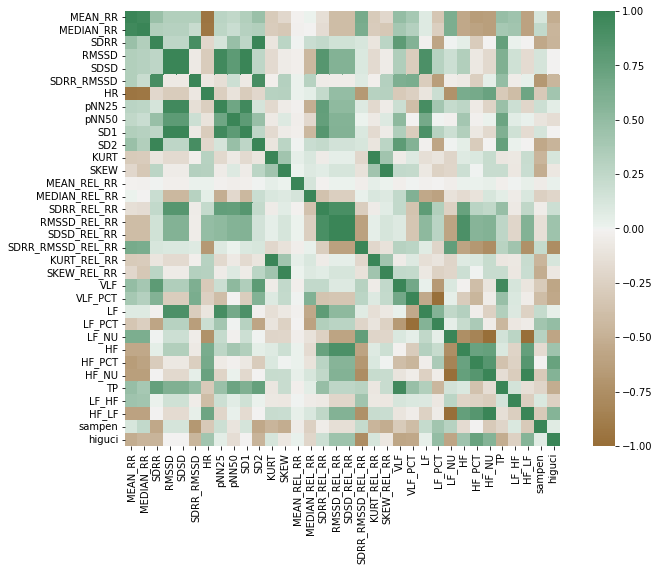

In [8]:
plt.figure(figsize=(12, 8))

sns.heatmap(
swell.corr(),
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
);

## Part 4: Machine Learning

### Feature Selection

In [9]:
X = swell.drop('condition',axis=1).to_numpy()
y = swell['condition']

In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
print(y.unique())
y = encoder.fit_transform(y)
print(np.unique(y))

['no stress' 'interruption' 'time pressure']
[0 1 2]


In [11]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [12]:
print(X.shape)
print(y.shape)

(410322, 34)
(410322,)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=101)

In [14]:
from sklearn.feature_selection import SelectKBest, f_classif
best_features = SelectKBest(score_func=f_classif)
best_features.fit_transform(X_train, y_train)

array([[ 973.06157957,  846.926255  ,   14.58269343, ..., 3654.56133348,
          81.32772655,  816.82074339],
       [ 921.1755808 ,  861.101565  ,   14.15899927, ..., 1429.71088907,
          62.90027791,  834.50497605],
       [ 812.77586422,  812.742645  ,   14.36159637, ...,  486.3619201 ,
          43.99496077,  563.27301469],
       ...,
       [ 800.61430917,  804.241965  ,   12.27222442, ..., 1695.71786535,
          72.5014297 ,  622.8735223 ],
       [ 807.25413643,  809.24277   ,   19.18883663, ..., 1133.85748765,
          43.51562567, 1419.30698835],
       [ 851.97274913,  858.354115  ,   11.02482941, ...,  920.77325673,
          61.11719693,  573.84606358]])

In [15]:
anova = pd.Series(data=best_features.scores_,index=swell.columns[:-1])
anova = anova.sort_values(ascending=False)

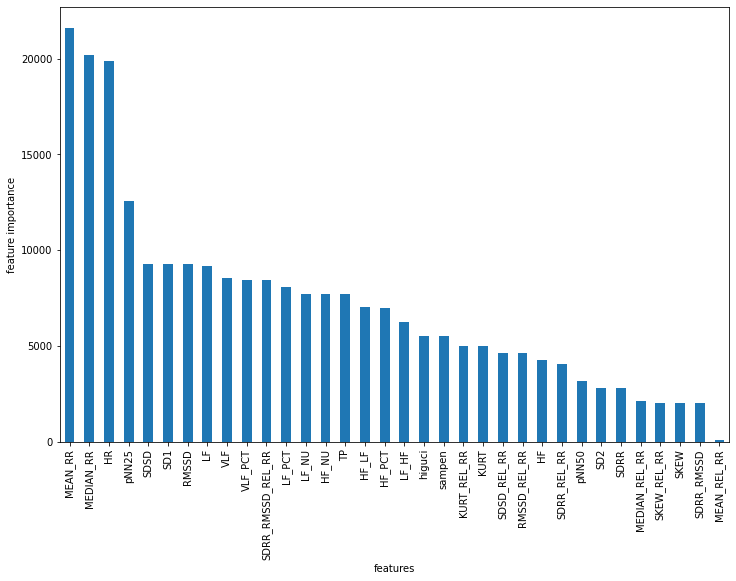

In [16]:
plt.figure(figsize=(12, 8))
plt.xlabel("features")
plt.ylabel("feature importance")
anova.plot.bar();

### 1D CNN

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=10)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D

def create_model():
  model = Sequential()
  model.add(Conv1D(filters=64, kernel_size=2, activation="relu", padding="same"))
  model.add(Dense(16, activation="relu"))
  model.add(MaxPooling1D())
  model.add(Flatten())
  model.add(Dense(3, activation = 'softmax'))

  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer = "adam",
                metrics = ['accuracy'])

  return model

In [19]:
cms = []
losses = []
histories = []
accuracies = []
reports = []
predictions = []

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

for i in range(2,len(anova.index)+1):
  print(i,'top features')

  X = swell[anova.index[:i]].to_numpy()
  y = swell['condition']

  encoder = LabelEncoder()
  y = encoder.fit_transform(y)

  X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=101)

  scaler = MinMaxScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
  X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

  with tf.device('/CPU:0'):
    model = create_model()
    history = model.fit(X_train, y_train, batch_size=64,
              epochs=600, verbose = 1,
              validation_data=(X_test, y_test),
              callbacks = [early_stop])
  
  loss, accuracy = model.evaluate(X_train, y_train)
  losses.append(loss)
  accuracies.append(accuracy)

  histories.append(pd.DataFrame(history.history))
  
  pred = model.predict(X_test)
  pred_y = pred.argmax(axis=-1)
  cm = confusion_matrix(y_test, pred_y)
  cms.append(cm)

  reports.append(classification_report(y_test, pred_y))

  pred = model.predict(X_test[:30])
  pred_y = pred.argmax(axis=-1)
  predictions.append(pred_y)

2 top features
10259/10259 [==============================] - 14s 1ms/step - loss: 0.8943 - accuracy: 0.5509


In [28]:
for count,accuracy in enumerate(accuracies):
  print(count,accuracy)

0 0.5508549809455872


In [20]:
print(cms[0])

[[    8 19395  3846]
 [   16 41763  2716]
 [    8 10847  3466]]


In [21]:
losses[0]

0.8942715525627136

In [22]:
histories[0]

,loss,accuracy,val_loss,val_accuracy
0,0.92278,0.553658,0.892705,0.551234


In [24]:
print(reports[0])

              precision    recall  f1-score   support

           0       0.25      0.00      0.00     23249
           1       0.58      0.94      0.72     44495
           2       0.35      0.24      0.28     14321

    accuracy                           0.55     82065
   macro avg       0.39      0.39      0.33     82065
weighted avg       0.45      0.55      0.44     82065



In [25]:
print(predictions[0])

[1 1 1 2 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1]


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 64)             192       
                                                                 
 dense (Dense)               (None, 2, 16)             1040      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 16)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                                 
Total params: 1,283
Trainable params: 1,283
Non-trainable params: 0
______________________________________________________